In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

2024-01-20 14:37:56.544737: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-20 14:37:56.544761: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-20 14:37:56.545226: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-20 14:37:56.550521: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [3]:
two_indices = tf.where(tf.math.equal(train_labels, 2))[:20,0]
two_images  = tf.gather(train_images, two_indices)/255

2024-01-20 14:37:58.458572: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-20 14:37:58.476617: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-20 14:37:58.476796: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
zer_indices = tf.where(tf.math.equal(train_labels, 0))[:20,0]
zer_images  = tf.gather(train_images, zer_indices)/255

In [5]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
import cagl
from cagl.sklearn import HalfSphereCompact
from cagl.sklearn import PXOR

In [7]:
from sklearn.pipeline import Pipeline

In [8]:
NDIMS = 3

In [9]:
pca = Pipeline((
    ('scaler0', StandardScaler()),
    ('pca', PCA(n_components=NDIMS-1, whiten=True )),
    ('compact', HalfSphereCompact())
))

In [10]:
imgs = np.concatenate((two_images,zer_images))
flat_imgs = np.reshape(imgs, (40,28*28) )
imgs_pca = pca.fit_transform(flat_imgs)

In [11]:
imgs_pca

array([[-0.51337373, -0.47475672,  0.71488005],
       [-0.6355942 , -0.1449082 ,  0.75830185],
       [-0.48685476, -0.01245508,  0.87339413],
       [-0.5425233 ,  0.48984703,  0.6824357 ],
       [-0.72393006,  0.35809714,  0.58965385],
       [-0.5526116 , -0.29385567,  0.7799162 ],
       [-0.6507333 , -0.2036938 ,  0.73147464],
       [-0.6342102 , -0.18321498,  0.75113887],
       [-0.59511226, -0.03910101,  0.80269074],
       [-0.82048243, -0.15691626,  0.54971427],
       [-0.7896524 , -0.06620403,  0.60997224],
       [-0.7892355 , -0.12947606,  0.600286  ],
       [-0.01755989, -0.05859947,  0.99812716],
       [-0.71967876, -0.2911986 ,  0.6302903 ],
       [ 0.24257421, -0.10593467,  0.96433175],
       [-0.69148475,  0.08968316,  0.71680254],
       [-0.42449865, -0.3825646 ,  0.82063705],
       [-0.6571358 , -0.3667636 ,  0.6585263 ],
       [-0.6973711 , -0.04142424,  0.71551204],
       [-0.6869407 , -0.3393208 ,  0.6426304 ],
       [ 0.75166297, -0.14873047,  0.642

In [12]:
img = pca.inverse_transform(imgs_pca[:1,:])

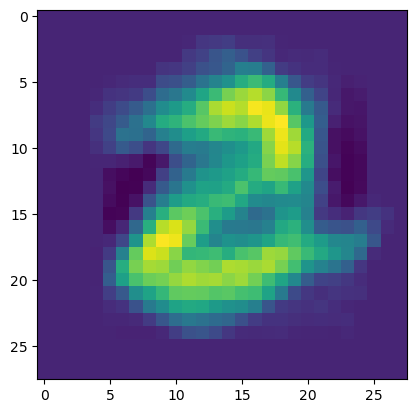

In [13]:
plt.imshow(np.reshape(img, (28,28) ))
plt.show()

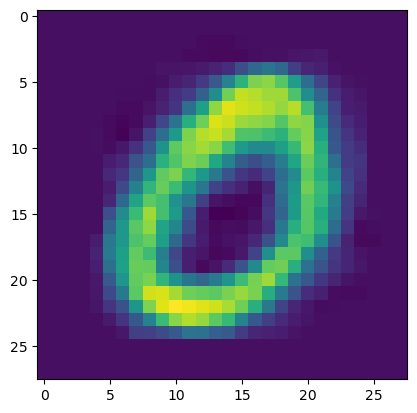

In [14]:
img = pca.inverse_transform(imgs_pca[20:21,:])
plt.imshow(np.reshape(img, (28,28) ))
plt.show()

In [15]:
imgs_no_compact_pca = pca[:-1].transform(flat_imgs)

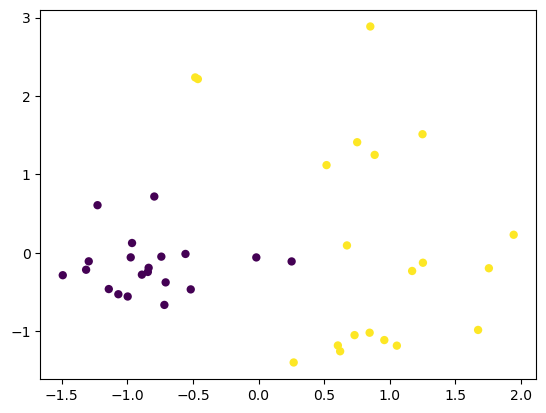

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(imgs_no_compact_pca[:,0], imgs_no_compact_pca[:,1], c=np.array([0 for i in range(20)]+[1 for i in range(20)]), lw=0 )

In [17]:
import cagl

In [84]:
pxor = Pipeline((('compact', HalfSphereCompact()), ('pxor', PXOR(-0.30))))

In [85]:
%load_ext wurlitzer

The wurlitzer extension is already loaded. To reload it, use:
  %reload_ext wurlitzer


In [86]:
pxor.fit(imgs_no_compact_pca, np.array([[0 for i in range(20)]+[1 for i in range(20)]]) )

[0, [1,
[[[29515655537704273059254211602279079091 / 2^127, 59031311075408546118508423204558158183 / 2^128], [79840455838411974450390340173757364115 / 2^126, 319361823353647897801561360695029456461 / 2^128], [50782426424571177467396096951055507443 / 2^127, 101564852849142354934792193902111014887 / 2^128], [29515655537704273059254211602279079091 / 2^127, 59031311075408546118508423204558158183 / 2^128], [79840455838411974450390340173757364115 / 2^126, 319361823353647897801561360695029456461 / 2^128], [50782426424571177467396096951055507443 / 2^127, 101564852849142354934792193902111014887 / 2^128], [-138564755449251707666763275896338172089 / 2^125, -1108518043594013661334106207170705376711 / 2^128], [-138564755449251707666763275896338172089 / 2^125, -1108518043594013661334106207170705376711 / 2^128]], [[-226353019060187982048962105065168681727 / 2^128, -113176509530093991024481052532584340863 / 2^127], [-38052703814012403639060074315143125625 / 2^128, -4756587976751550454882509289392890703

Pipeline(steps=[('compact', HalfSphereCompact()), ('pxor', PXOR(dval=-0.3))])

In [87]:
pxor[1].w0

array([-0.66519174, -0.11182685,  0.73825111])

In [88]:
pxor[1].w1

array([ 0.66519174,  0.11182685, -0.73825111])

In [89]:
pxor.predict(imgs_no_compact_pca)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [90]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

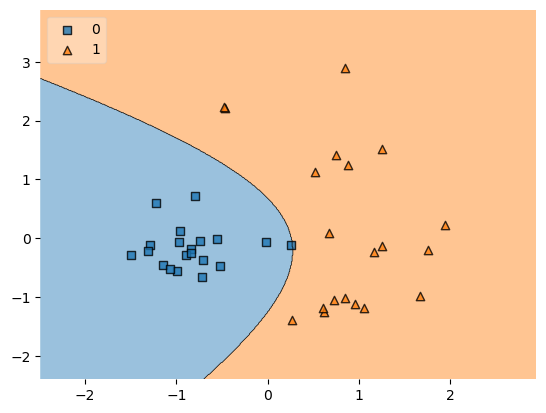

In [91]:
plot_decision_regions(imgs_no_compact_pca, np.array([0 for i in range(20)]+[1 for i in range(20)]), clf=pxor, legend=2 )